In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
data = pd.read_csv('../data/diabetes.csv')

In [3]:
df = data.copy()

In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Missing / Invalid Values: Glucose, BloodPressure, SkinThickness, BMI, Insulin have zeros → need imputation.

In [6]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [15]:
df['Outcome'].value_counts(normalize=True)


Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

The dataset is moderately imbalanced, with almost twice as many non-diabetic cases as diabetic cases.

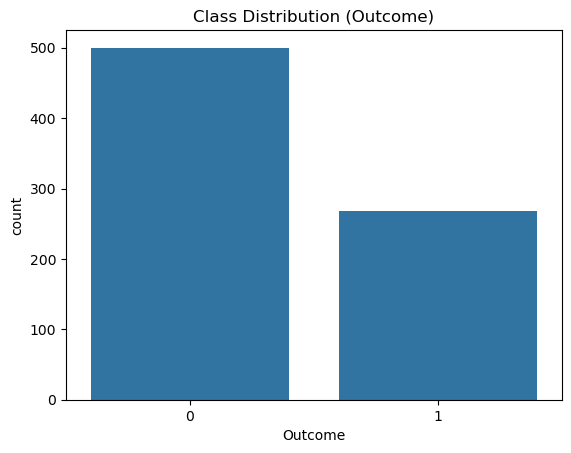

In [16]:
sns.countplot(x='Outcome', data=df)
plt.title("Class Distribution (Outcome)")
plt.show()


In [7]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[cols] = df[cols].replace(0, np.nan)


In [8]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df[cols] = imputer.fit_transform(df[cols])


In [9]:
df['Insulin_log'] = np.log1p(df['Insulin'])


In [10]:
df = df.drop(columns=['Insulin'])


In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_log
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,32.455208,0.471876,33.240885,0.348958,4.827137
std,3.369578,30.438286,12.096642,8.791221,6.875177,0.331329,11.760232,0.476951,0.494893
min,0.000000,44.000000,24.000000,7.000000,18.200000,0.078000,21.000000,0.000000,2.708050
25%,1.000000,99.750000,64.000000,25.000000,27.500000,0.243750,24.000000,0.000000,4.808086
50%,3.000000,117.000000,72.000000,29.000000,32.300000,0.372500,29.000000,0.000000,4.836282
75%,6.000000,140.250000,80.000000,32.000000,36.600000,0.626250,41.000000,1.000000,4.853976
max,17.000000,199.000000,122.000000,99.000000,67.100000,2.420000,81.000000,1.000000,6.741701


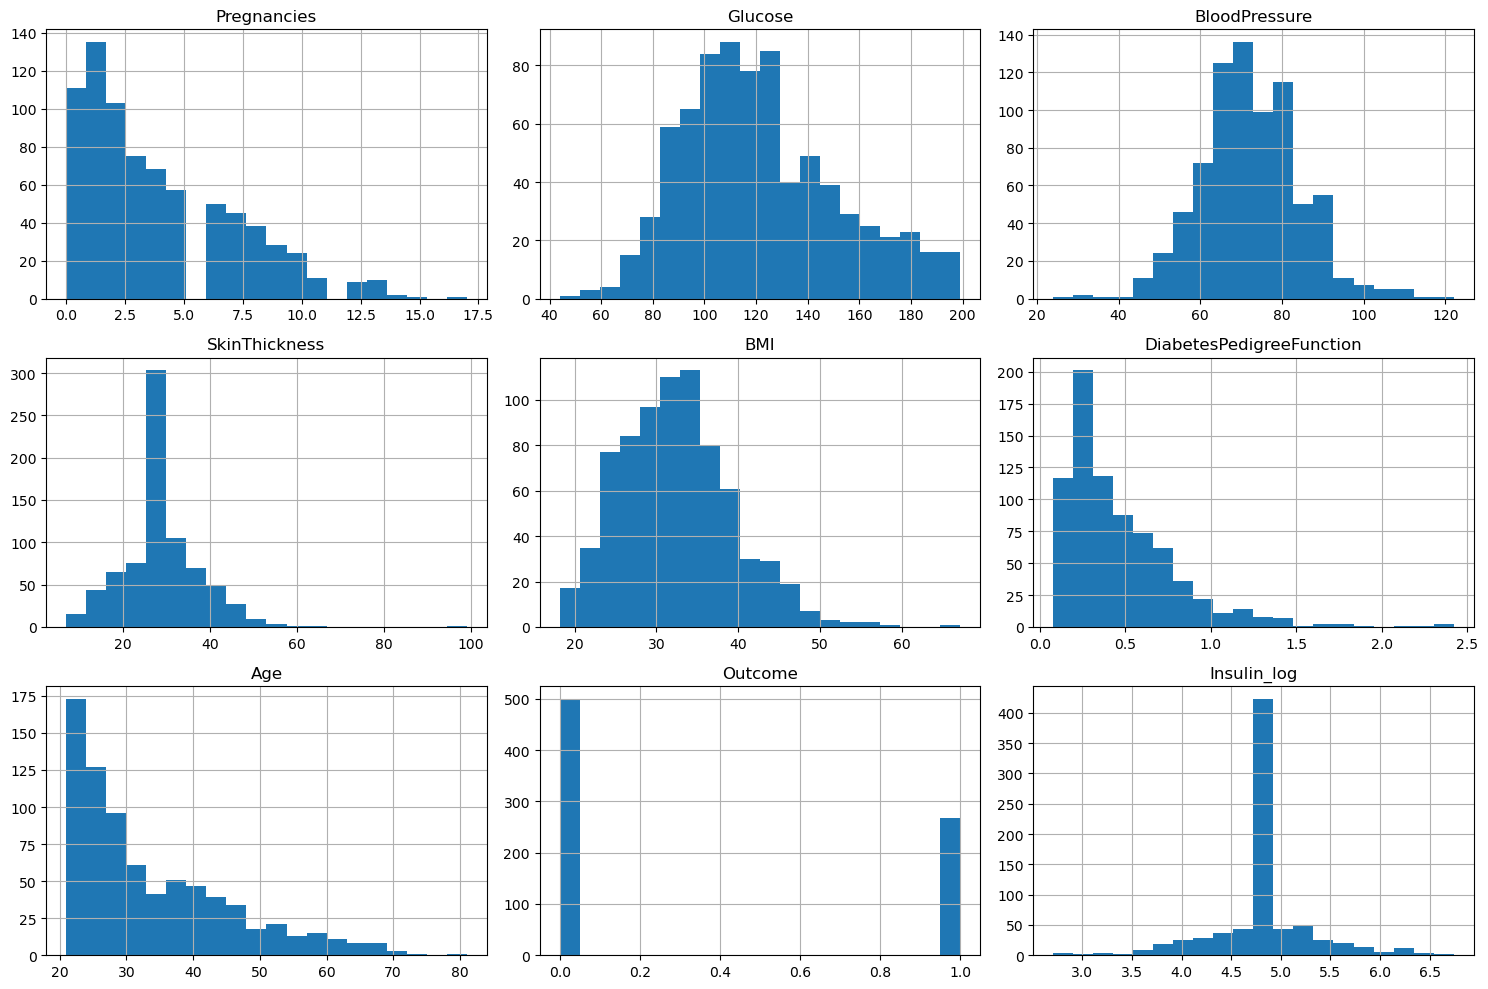

In [17]:
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()


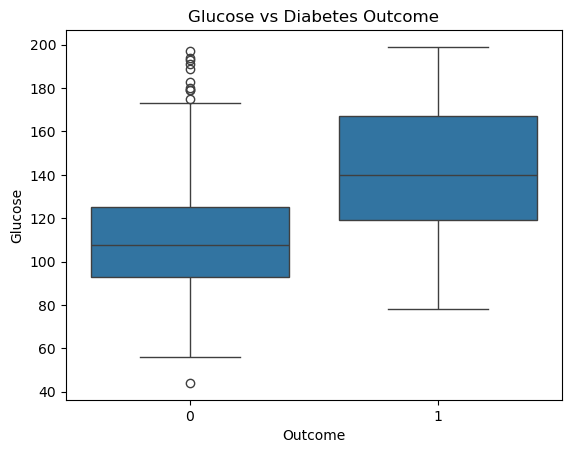

In [18]:
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title("Glucose vs Diabetes Outcome")
plt.show()


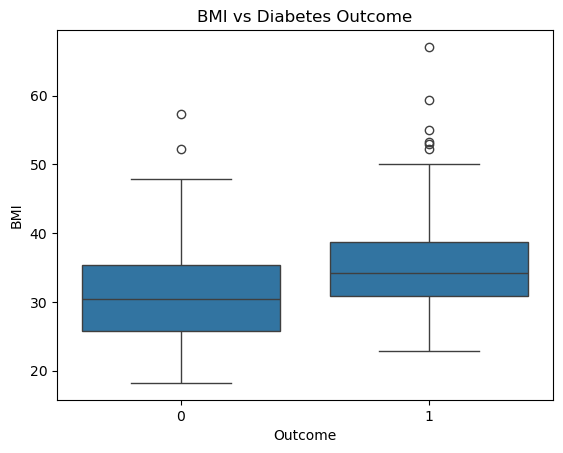

In [19]:
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title("BMI vs Diabetes Outcome")
plt.show()


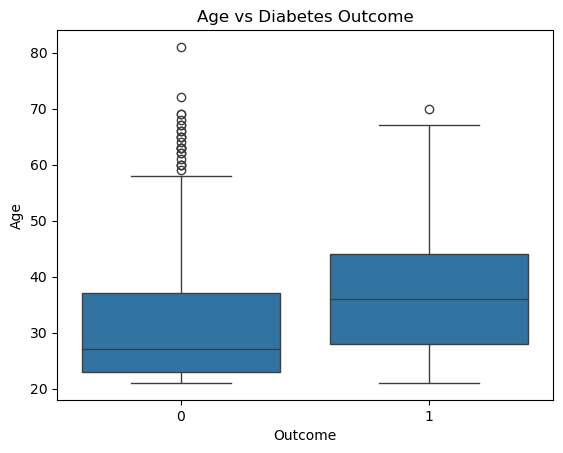

In [20]:
sns.boxplot(x='Outcome', y='Age', data=df)
plt.title("Age vs Diabetes Outcome")
plt.show()


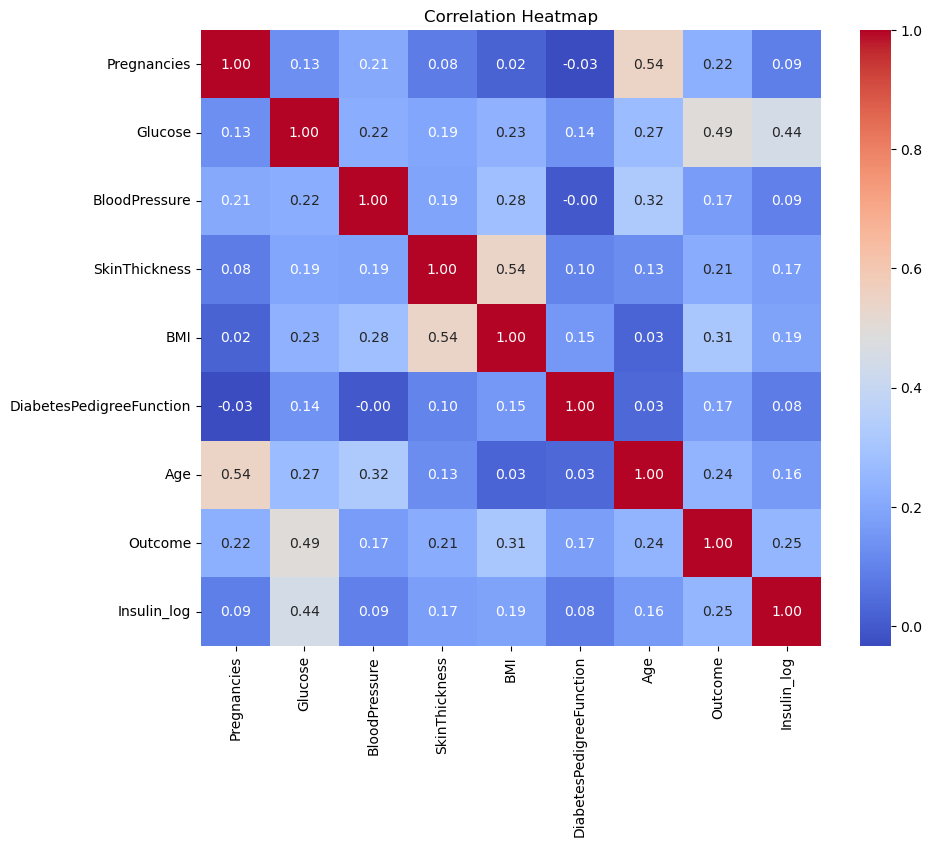

In [22]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [23]:
df.groupby('Outcome').mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Insulin_log
Outcome,,,,,,,,
0,3.298000,110.682000,70.920000,27.726000,30.885600,0.429734,31.190000,4.737085
1,4.865672,142.130597,75.123134,31.686567,35.383582,0.550500,37.067164,4.995145


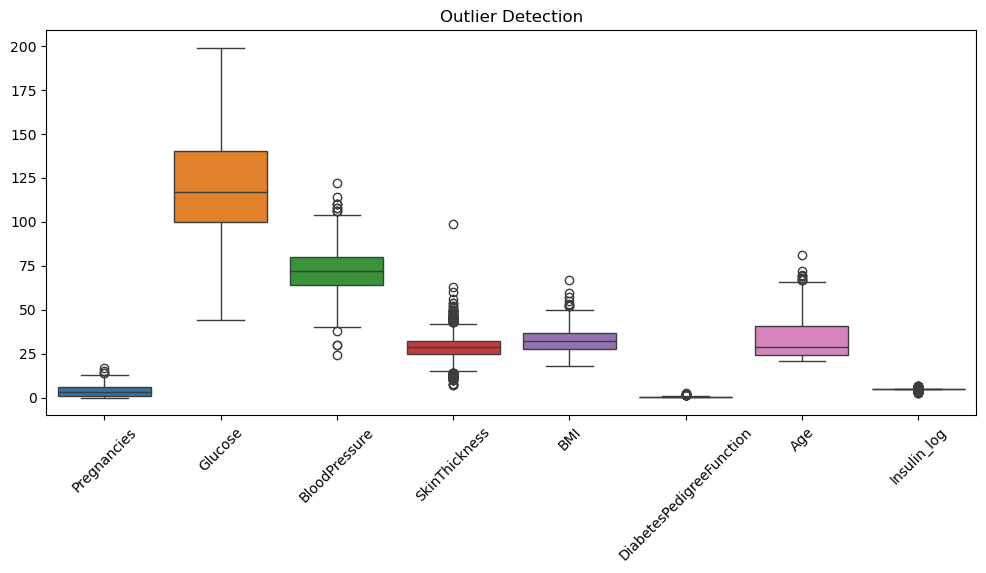

In [24]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df.drop(columns='Outcome'))
plt.xticks(rotation=45)
plt.title("Outlier Detection")
plt.show()
